<center>
    <b><span style="font-size: 1em;">
        VERIFICATION & VALIDATION
    </span></b>
    <br>
    <b><span style="font-size: 2em;">
        FLOWUnsteady
    </span></b>
    <br>
    <span style="font-size: 1em;">
        Last Update: 12/2019
    </span>  
</center>

In [1]:
# Load simulation engine
import FLOWUnsteady
uns = FLOWUnsteady
vlm = uns.vlm
gt = vlm.vtk

# ------------ GENERIC MODULES -------------------------------------------------
using Base.Test
using PyPlot
using JLD

# ------------ HEADERS ---------------------------------------------------------
# Load modules
for module_name in ["bertinswing"]
    include("../test/test_"*module_name*".jl")
end

# Validation

## VLM Solver

Testing FLOWVLM's solver with a rigid semi-infinite wake.

### Bertin's Wing: Isolated Wing

Testing of an isolated, planar, 45-deg swept-back wing (Bertin's planar wing
    in Example 7.2, pp. 343 of Bertin's Aerodynamics for Engineers). Validated
    with experimental data from Weber and Brebner (1958), Low-speed tests on
    45-deg swept-back wings, part I, Tables 3 and 4.

<img src="img/bertinswing04.png" alt="Pic here" width="700px">

	Running Bertin's wing test...
		Generating geometry...
		Simulation setup...
		Core overlap:		2.0
		Core size:		Inf*b
		Time step translation:	Inf*b
		Running simulation...


		Postprocessing...


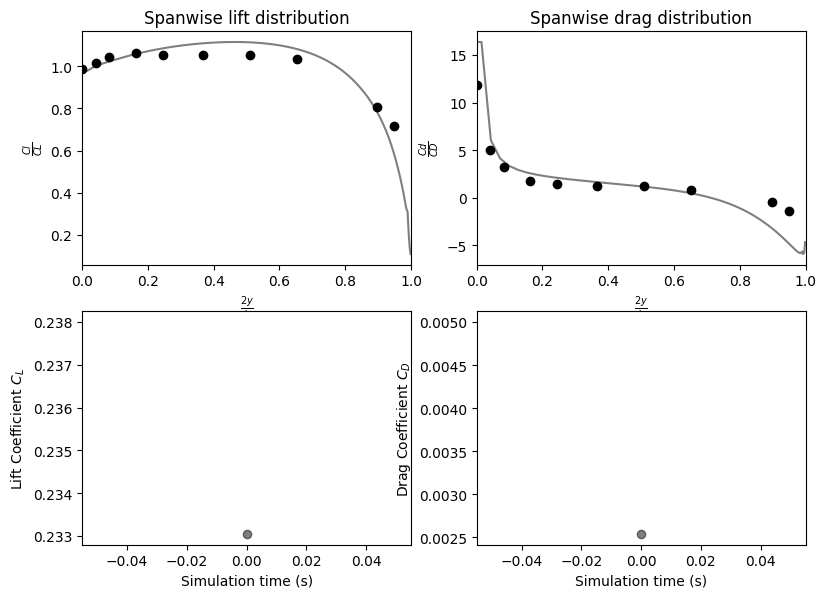

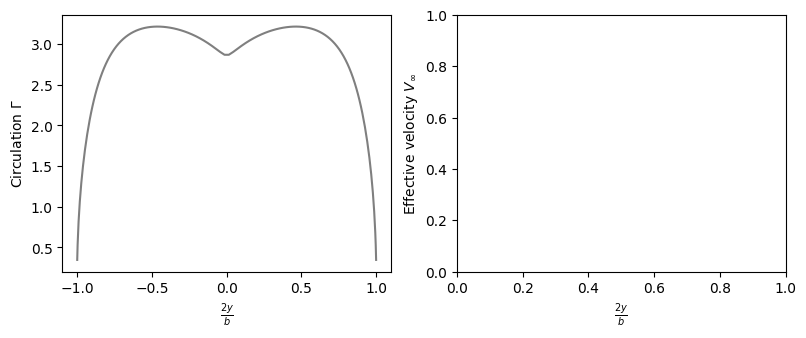

		 PARAMETER	Experimental	Simulation 	Error %    
		        CL	2.38000e-01	2.33043e-01	2.08259e+00
		        CD	5.00000e-03	2.53705e-03	4.92590e+01
		TEST RESULT:	true


Test Passed

In [3]:
@test bertin_VLM(; wake_coupled=false, nsteps=0, 
                    verbose=true, verbose2=false, 
                    disp_plot=true, figsize_factor=2/3)

## VPM-Coupled VLM

Testing FLOWVLM's solver coupled with a VPM unsteady wake.

### Bertin's Wing: Isolated Wing

Testing of an isolated, planar, 45-deg swept-back wing (Bertin's planar wing
    in Example 7.2, pp. 343 of Bertin's Aerodynamics for Engineers). Validated
    with experimental data from Weber and Brebner (1958), Low-speed tests on
    45-deg swept-back wings, part I, Tables 3 and 4.

<img src="https://media.githubusercontent.com/media/byuflowlab/FLOWFVS/master/docs/vid/bertinswing03_1and2.gif" alt="Vid here" width="700px">

	Running Bertin's wing test...
		Generating geometry...
		Simulation setup...
		Core overlap:		2.0
		Core size:		0.027*b
		Time step translation:	0.013*b
		Running simulation...
*******************************************************************
*                     SETTINGS                                    *
*******************************************************************
PARTICLE FIELD SETTINGS
	Initial particles:			 0
	Max particles:				 39064
	Solver method:				 ExaFMM
	Kinematic viscosity (nu):		 1.4775510204081632e-5
	Uphi function:				 false
SOLVER SETTINGS
	Time integration method:		 rk
	Vortex stretching scheme:		 transpose
	Divergence relaxation (eta):		 449.08163265306126
	Viscous diffusion through PSE:		 false
	Viscous diffusion through CS:		 false
	Fix Lagrangian distortion:		 false
	EXAFMM
		Multipole expansion order (P):		 4
		Max particles per leaf (NCRIT):		 50
		Neighborhood criteria (THETA):		 0.4
		Regularizing neighborhood criteria (PHI): 0.3333333333333333
	

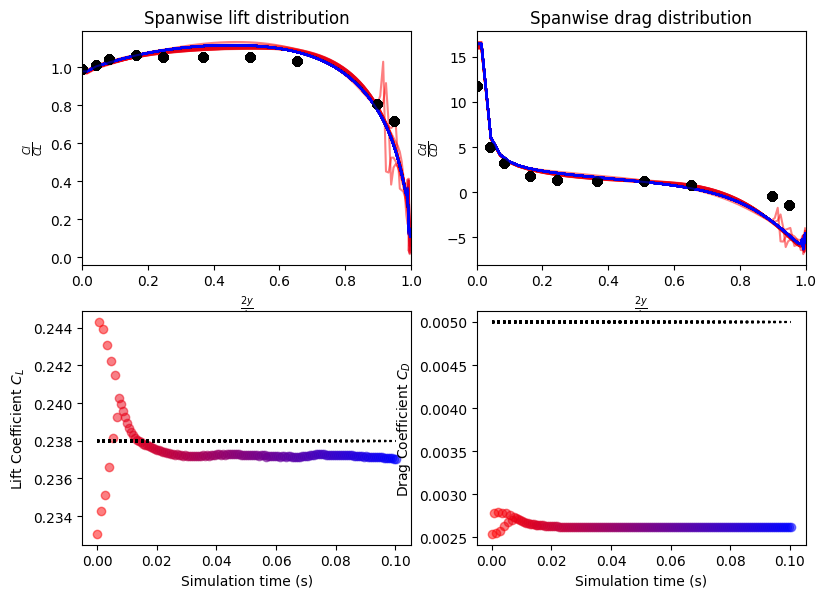

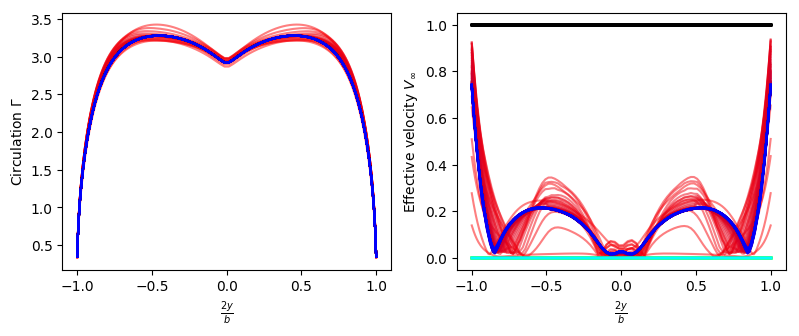

		 PARAMETER	Experimental	Simulation 	Error %    
		        CL	2.38000e-01	2.37054e-01	3.97435e-01
		        CD	5.00000e-03	2.61590e-03	4.76820e+01
		TEST RESULT:	true


Test Passed

In [4]:
@test bertin_VLM(; wake_coupled=true, nsteps=150,
                    verbose=true, verbose2=true, 
                    disp_plot=true, figsize_factor=2/3)

## Kinematic VLM Solver

Testing FLOWVLM's solver obtaining it's boundary conditions from the system's kinematic motion.

### Bertin's Wing: Isolated Wing

Testing of an isolated, planar, 45-deg swept-back wing (Bertin's planar wing
    in Example 7.2, pp. 343 of Bertin's Aerodynamics for Engineers). Validated
    with experimental data from Weber and Brebner (1958), Low-speed tests on
    45-deg swept-back wings, part I, Tables 3 and 4.

<img src="https://media.githubusercontent.com/media/byuflowlab/FLOWFVS/master/docs/vid/bertinswing06_1and2.gif" alt="Vid here" width="700px">

	Running Bertin's wing test...
		Generating geometry...
		Simulation setup...
		Core overlap:		2.0
		Core size:		0.027*b
		Time step translation:	0.013*b
		Running simulation...
*******************************************************************
*                     SETTINGS                                    *
*******************************************************************
PARTICLE FIELD SETTINGS
	Initial particles:			 0
	Max particles:				 39064
	Solver method:				 ExaFMM
	Kinematic viscosity (nu):		 1.4775510204081632e-5
	Uphi function:				 false
SOLVER SETTINGS
	Time integration method:		 rk
	Vortex stretching scheme:		 transpose
	Divergence relaxation (eta):		 449.08163265306126
	Viscous diffusion through PSE:		 false
	Viscous diffusion through CS:		 false
	Fix Lagrangian distortion:		 false
	EXAFMM
		Multipole expansion order (P):		 4
		Max particles per leaf (NCRIT):		 50
		Neighborhood criteria (THETA):		 0.4
		Regularizing neighborhood criteria (PHI): 0.3333333333333333
	

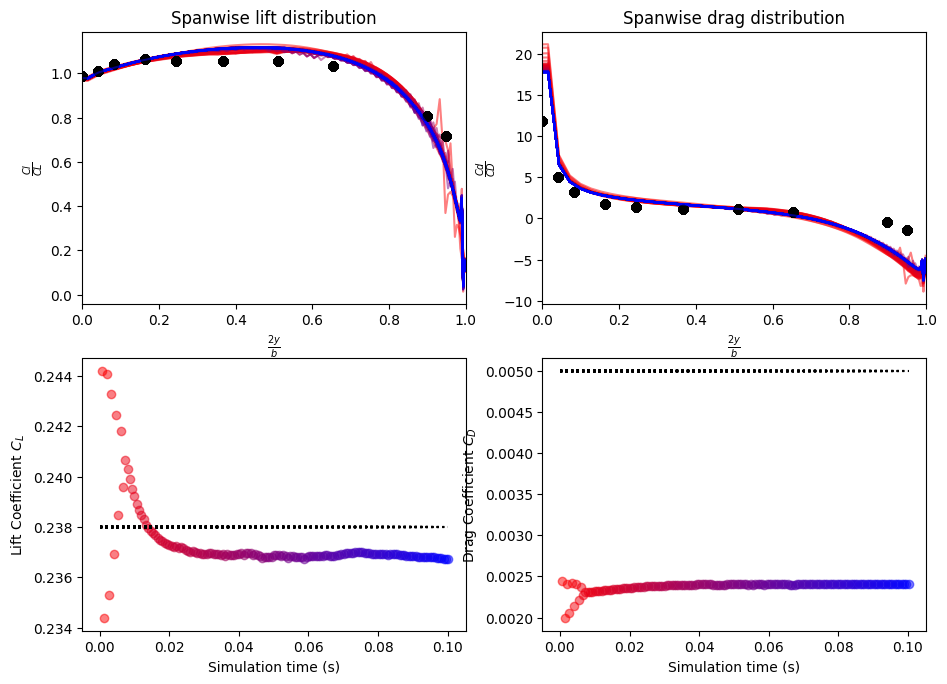

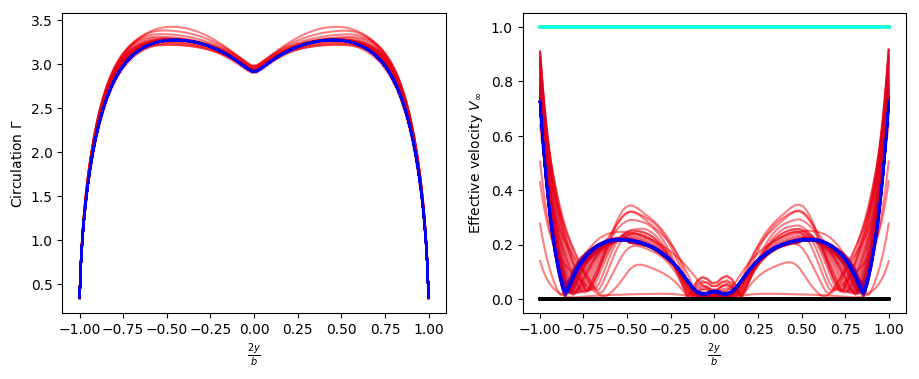

		 PARAMETER	Experimental	Simulation 	Error %    
		        CL	2.38000e-01	2.36748e-01	5.26155e-01
		        CD	5.00000e-03	2.60779e-03	4.78442e+01
		TEST RESULT:	true


Test Passed

In [5]:
@test bertin_kinematic(; nsteps=150,
                         verbose=true, verbose2=true, 
                         disp_plot=true, figsize_factor=7/9)

## Rotor Solver

<img src="https://media.githubusercontent.com/media/byuflowlab/FLOWFVS/master/docs/vid/fvs_singlerotor02.gif" alt="Vid here" width="700px">

Simulation of an isolated 9.4in rotor in hover. The rotor and
configuration matches the 3D-printed propeller described in Ning, Z.,
*Experimental investigations on the aerodynamic and aeroacoustic characteristics
of small UAS propellers*, Sec. 5.2. This rotor roughly resembles a DJI Phantom
II rotor. Ning reports measuring a thrust coefficient $C_T$ of 0.1007.

The rotor model was validated in high detail in Alvarez, E. J., and Ning, A., “High-fidelity Modeling of Multirotor Aerodynamic Interactions for Aircraft Design,” AIAA Journal. In that paper, it was shown an error less than 1\% between predicted and measured $C_T$. However, for any realistic full-vehicle simulation with FLOWFVS, rotor simulation are rather run in a coarse resolution (less than 10 blade elements per blade), hence in this simulation with FLOWFVS we are content to find an agreement between 30\% (or $C_T$ in between 0.7 and 1.3).

	Generating geometry...


	Generating airfoils...

Angle		Cl		Cd		Cm		Converged
-0.900000	-0.162790	0.084226	-0.019171	1
-2.000000	-0.135494	0.087115	-0.027502	1
-3.000000	-0.110333	0.089425	-0.034650	1
-4.000000	-0.085010	0.091704	-0.041394	1
-5.000000	-0.060774	0.094332	-0.047524	1
-6.000000	-0.040686	0.097837	-0.052440	1
-7.000000	-0.027934	0.102685	-0.055483	1
-8.000000	-0.023441	0.108907	-0.056669	1
-9.000000	-0.026505	0.116177	-0.056498	1
-10.000000	-0.035979	0.124112	-0.055430	1
-11.000000	-0.050697	0.132419	-0.053760	1
-12.000000	-0.069967	0.140975	-0.051557	1
-13.000000	-0.093167	0.149735	-0.048832	1
-13.800000	-0.114092	0.156891	-0.046290	1
-14.280000	-0.127518	0.161250	-0.044612	1
-14.452000	-0.132472	0.162824	-0.043984	0
-14.552000	-0.135384	0.163741	-0.043612	0
-14.652000	-0.138320	0.164661	-0.043235	0
-14.752000	-0.141279	0.165582	-0.042854	0
-14.852000	-0.144258	0.166508	-0.042468	0
0.000000	-0.180280	0.081746	-0.012655	1
1.000000	-0.168846	0.080646	-0.009762	1
2.000000	-0.123151	0.082238	-0.0113

Time step 330 out of 432 	Particles: 16872
Time step 340 out of 432 	Particles: 17422
Time step 350 out of 432 	Particles: 17972
Time step 360 out of 432 	Particles: 18528
Time step 370 out of 432 	Particles: 19088
Time step 380 out of 432 	Particles: 19646
Time step 390 out of 432 	Particles: 20208
Time step 400 out of 432 	Particles: 20768
Time step 410 out of 432 	Particles: 21332
Time step 420 out of 432 	Particles: 21894
Time step 430 out of 432 	Particles: 22458


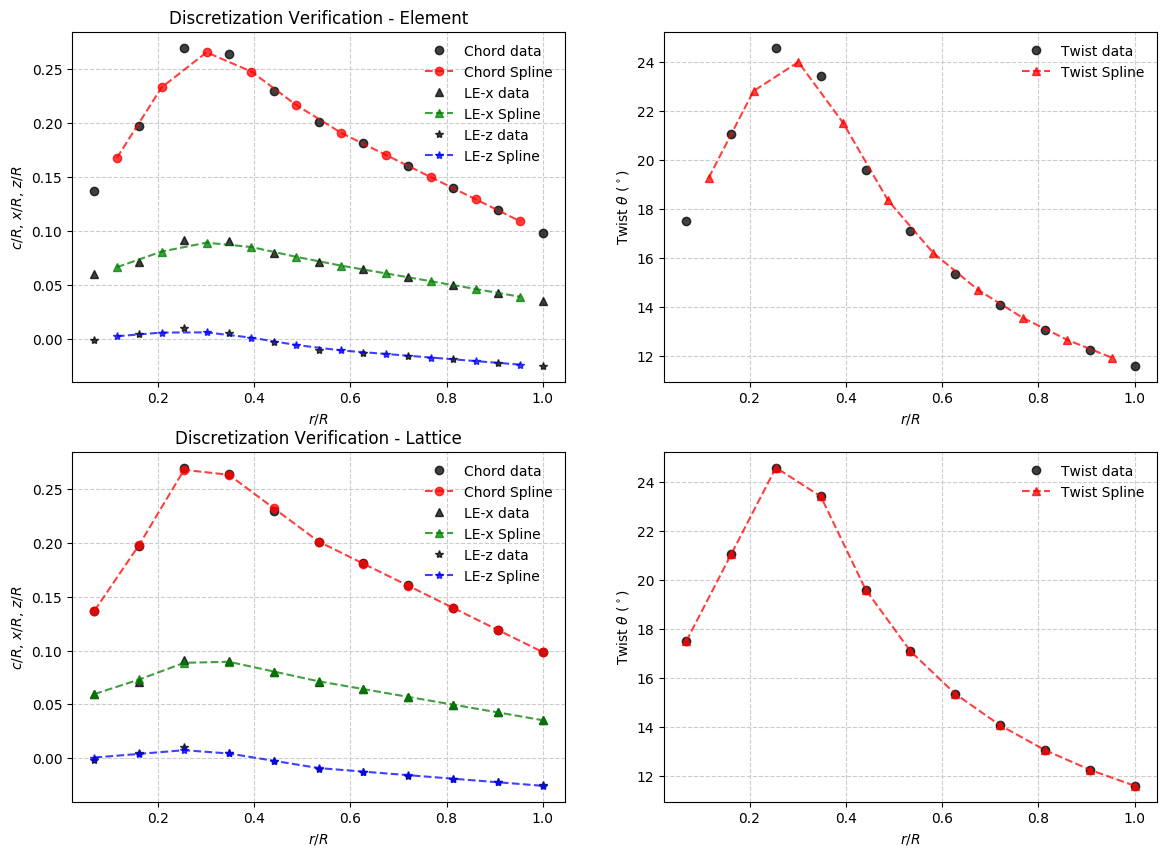

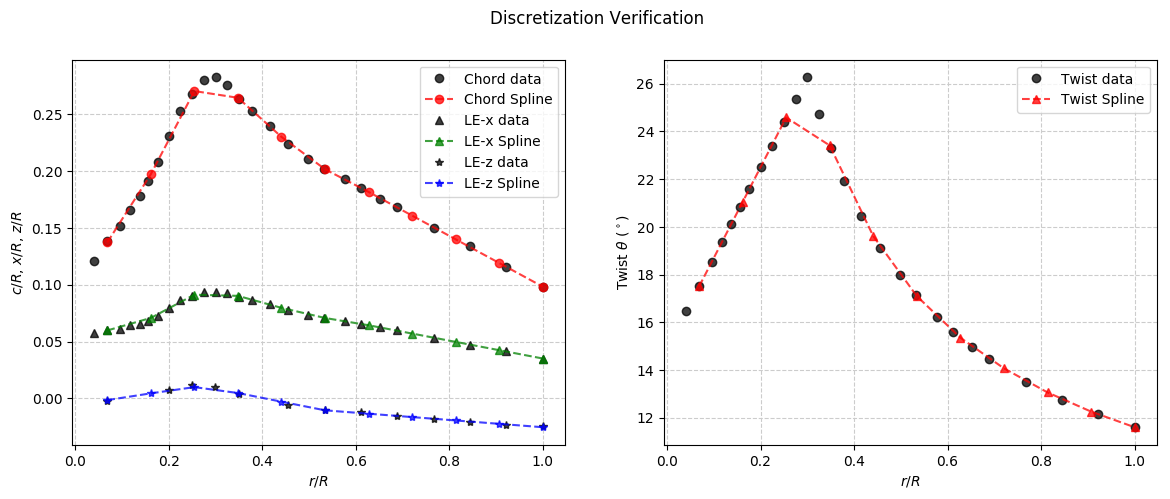

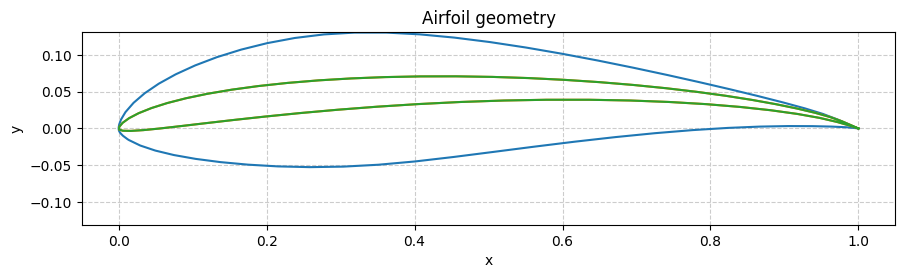

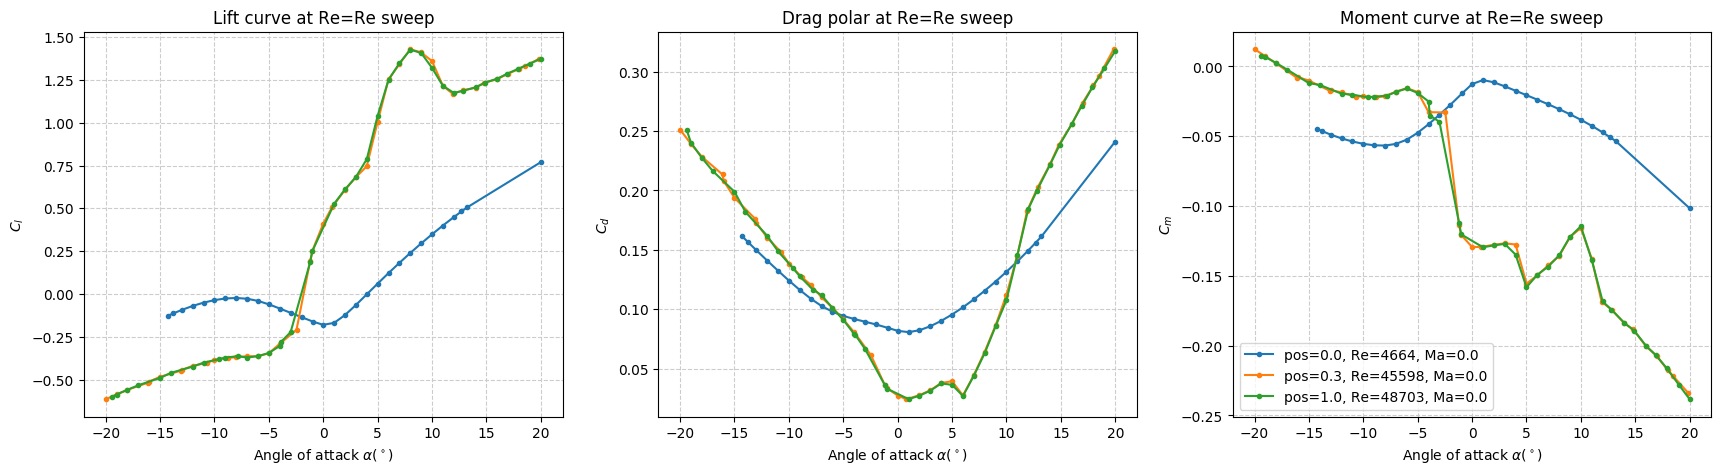

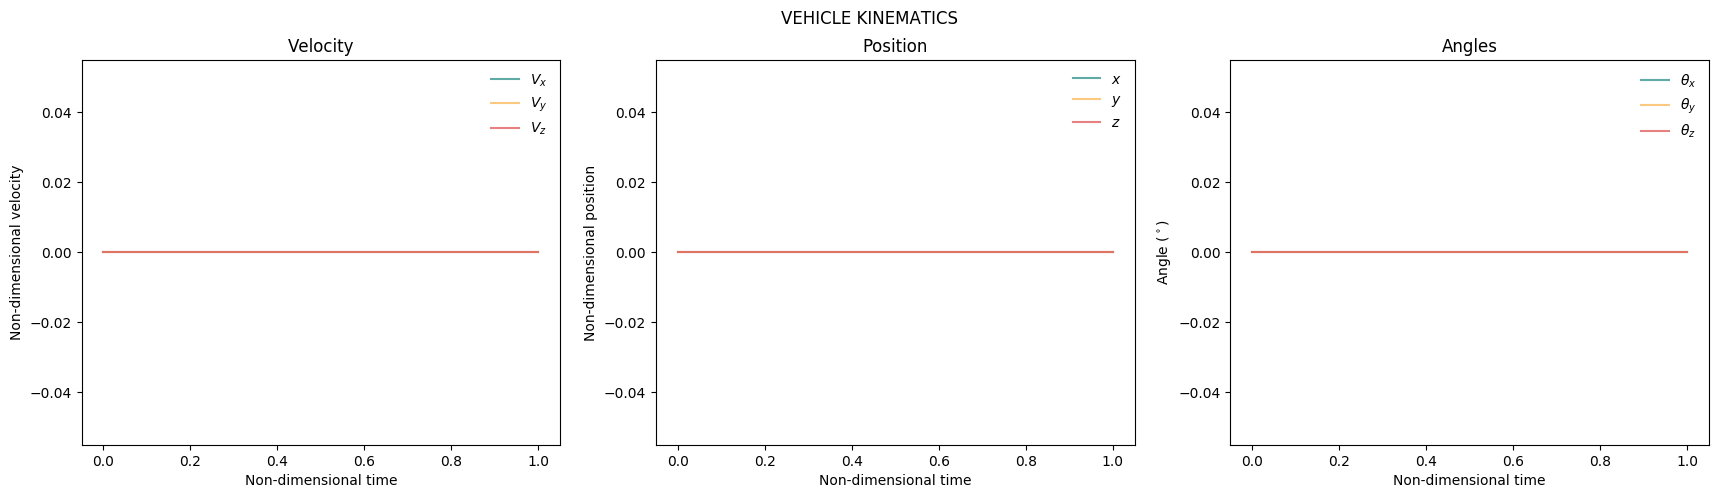

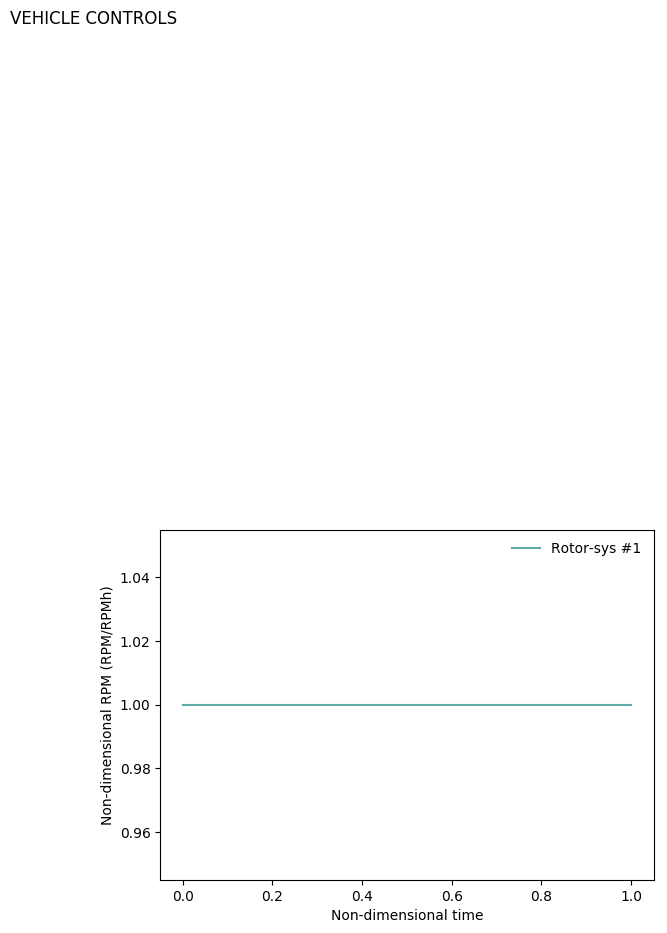

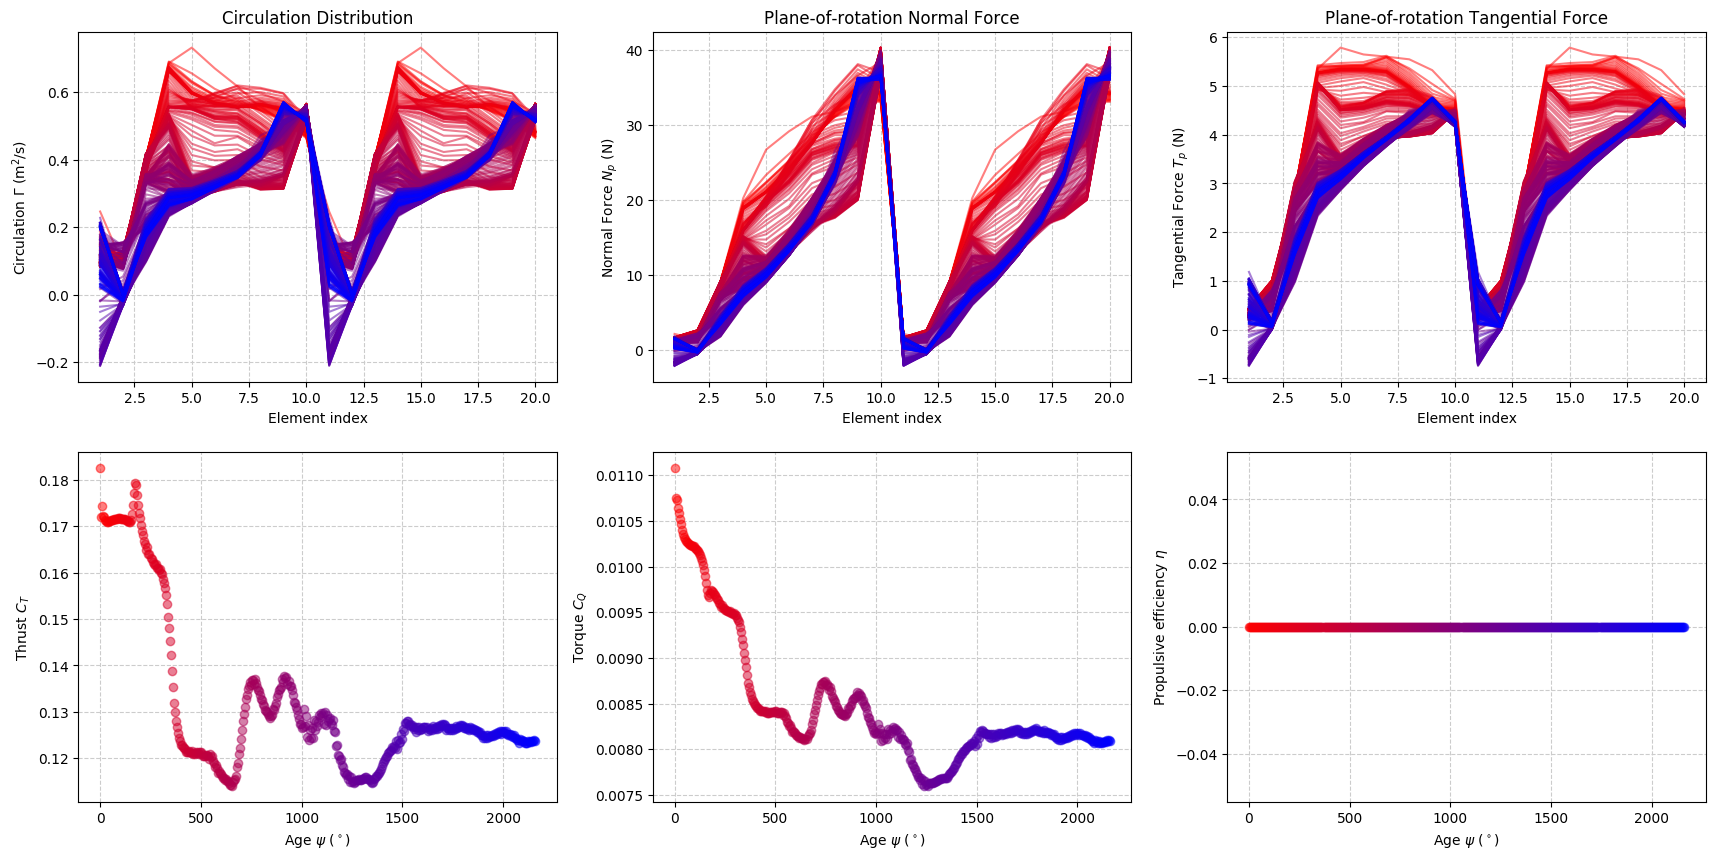

*******************************************************************
END 	2019-12-26T15:48:49.858
*******************************************************************
ELAPSED TIME: 0 hours 19 minutes 50 seconds


In [9]:
include("../examples/singlerotor.jl")

singlerotor();

## Rotor-on-Wing and Wing-on-Rotor Interactions

Testing rotor-on-wing and wing-on-rotor modeling using a scaled-down Bertin's
wing (45-deg, swept-back, planar wing in Example 7.2, pp. 343 of Bertin's
Aerodynamics for Engineers) with two APC 10x7 propellers (one on each side).

In [7]:
include("../examples/blownwing/blownwing.jl");

### Isolated Propeller

<img src="https://media.githubusercontent.com/media/byuflowlab/FLOWFVS/master/docs/vid/fvs_singleprop00.gif" alt="Vid here" width="700px">

First, let's run the isolated APC 10x7 to get reference $C_T$, $C_Q$, and $\eta$ values in the absence of the wing. The APC Thin-electric 10x7 was used before for validation of the propeller model in Alvarez, E. J., and Ning, A., “High-fidelity Modeling of Multirotor Aerodynamic Interactions for Aircraft Design,” AIAA Journal.

Experimental values reported in McCrink, M. H., & Gregory, J. W. (2017), *Blade Element Momentum Modeling of Low-Reynolds Electric Propulsion Systems*, shows $C_T=0.060$, $C_Q=0.0077$, and $\eta=0.73$ at $J=0.59$. Here we see that the FLOWFVS simulation predict $C_T=0.055$, $C_Q=0.0068$, and $\eta=0.77$ at $J=0.60$, which is consistent with what Alvarez and Ning reported in their simulations.

	OPERATION PARAMETERS
		J:		0.6
		ReD07:		1.5e6
		RPM:		9207
		Mtip:		0.357
		Minf:		0.068
	Generating geometry...
	Generating airfoils...

Angle		Cl		Cd		Cm		Converged
-1.000000	-0.081576	0.041480	-0.032980	1
-2.000000	-0.104797	0.044431	-0.028233	1
-2.900000	-0.026140	0.050074	-0.036532	1
-4.000000	-0.365753	0.075166	0.016774	1
-5.000000	-0.302560	0.083387	0.008387	1
-6.000000	-0.249270	0.090666	0.000281	1
-7.000000	-0.180781	0.094633	-0.008691	1
-8.000000	-0.051532	0.087606	-0.037120	1
-8.900000	-0.079940	0.096307	-0.034435	1
-9.230000	-0.090839	0.099618	-0.033341	1
-9.407000	-0.096773	0.101418	-0.032731	0
-9.507000	-0.100152	0.102443	-0.032379	0
-9.607000	-0.103550	0.103472	-0.032022	0
-9.707000	-0.106966	0.104507	-0.031661	0
-9.807000	-0.110400	0.105547	-0.031294	0
-16.000000	-0.447829	0.201766	0.018565	1
-17.000000	-0.495518	0.217145	0.022619	1
-18.000000	-0.538967	0.232091	0.026440	1
-19.000000	-0.579959	0.246965	0.030707	1
-20.000000	-0.615722	0.259354	0.035304	1
0.000000	-0.00

14.000000	0.933938	0.169253	-0.076970	1
15.000000	0.601543	0.161882	-0.058380	1
16.000000	0.618060	0.173092	-0.060776	1
16.900000	0.647746	0.186386	-0.062651	1
18.000000	0.648211	0.195124	-0.066630	1
18.900000	0.668492	0.206781	-0.069183	1
19.670000	0.676996	0.215128	-0.072124	1
	Generating FLOWVLM Rotor...
*******************************************************************
*                     SETTINGS                                    *
*******************************************************************
PARTICLE FIELD SETTINGS
	Initial particles:			 0
	Max particles:				 24192
	Solver method:				 ExaFMM
	Kinematic viscosity (nu):		 1.4775510204081632e-5
	Uphi function:				 false
SOLVER SETTINGS
	Time integration method:		 rk
	Vortex stretching scheme:		 transpose
	Divergence relaxation (eta):		 3314.3060042970396
	Viscous diffusion through PSE:		 false
	Viscous diffusion through CS:		 false
	Fix Lagrangian distortion:		 false
	EXAFMM
		Multipole expansion order (P):		 4
		Max parti

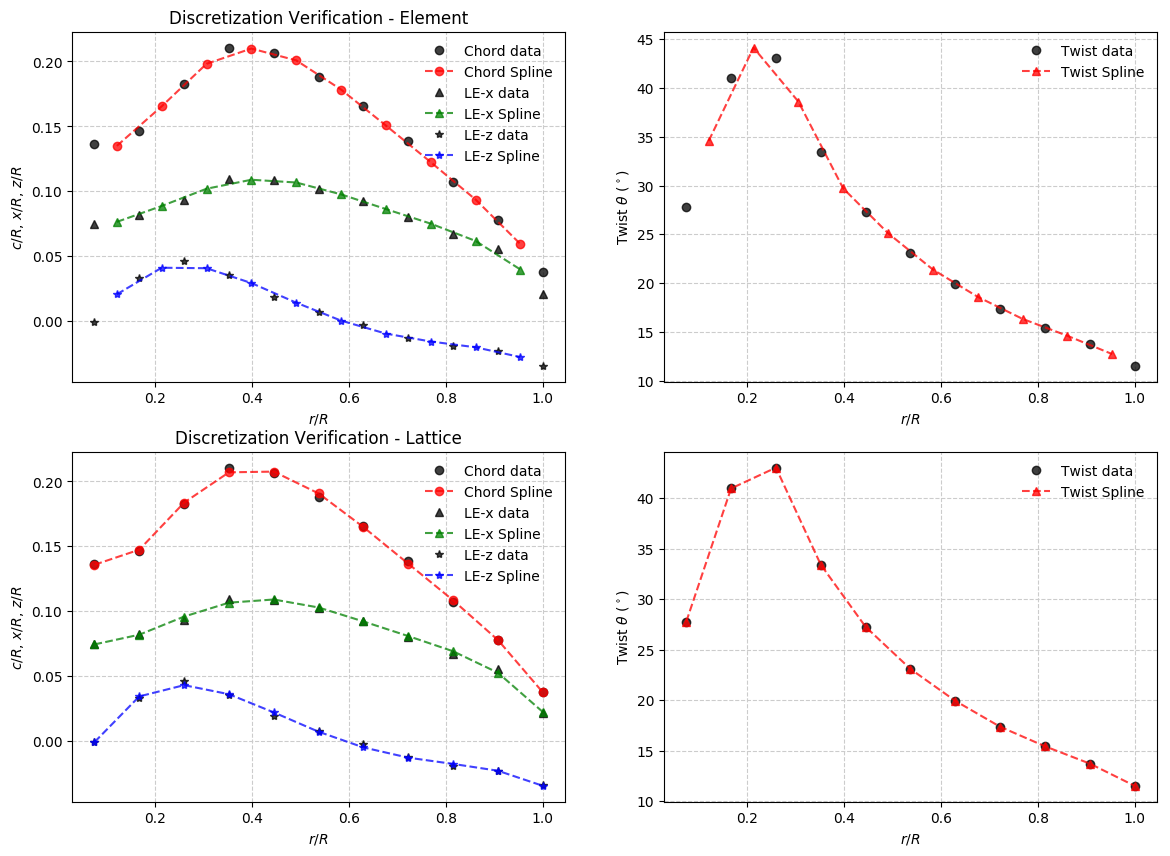

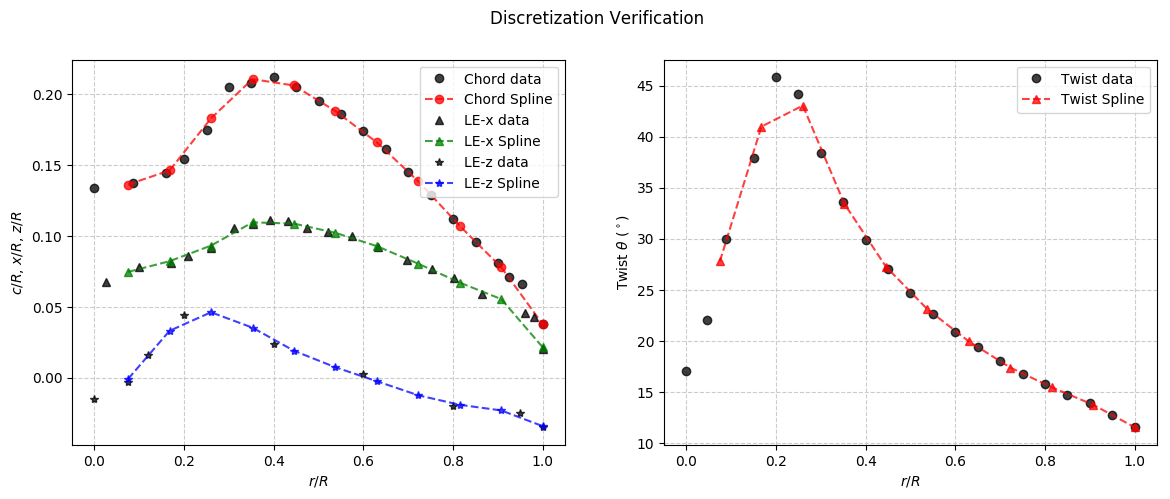

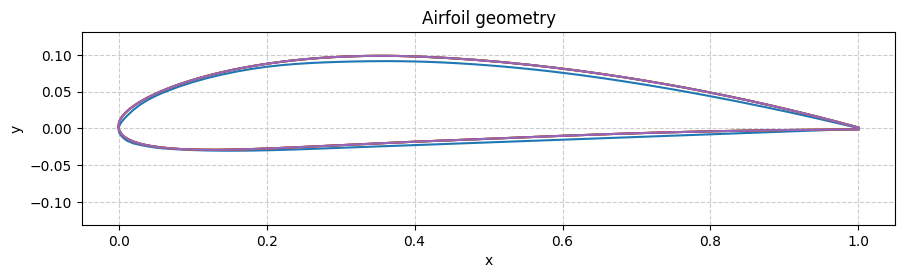

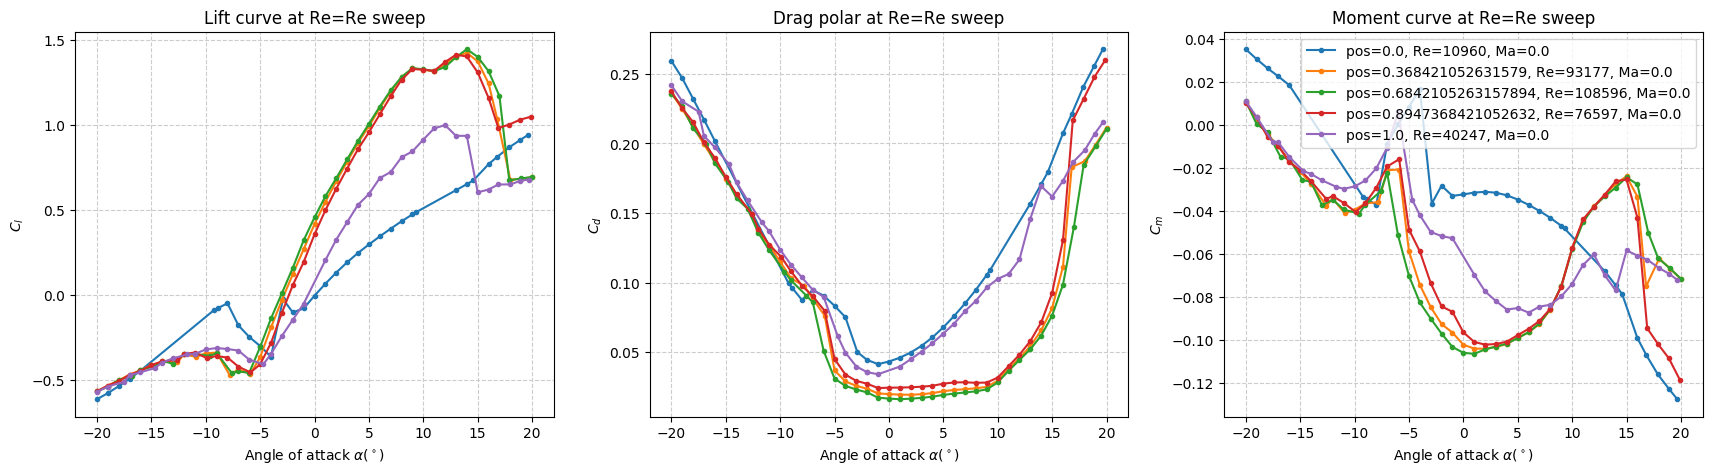

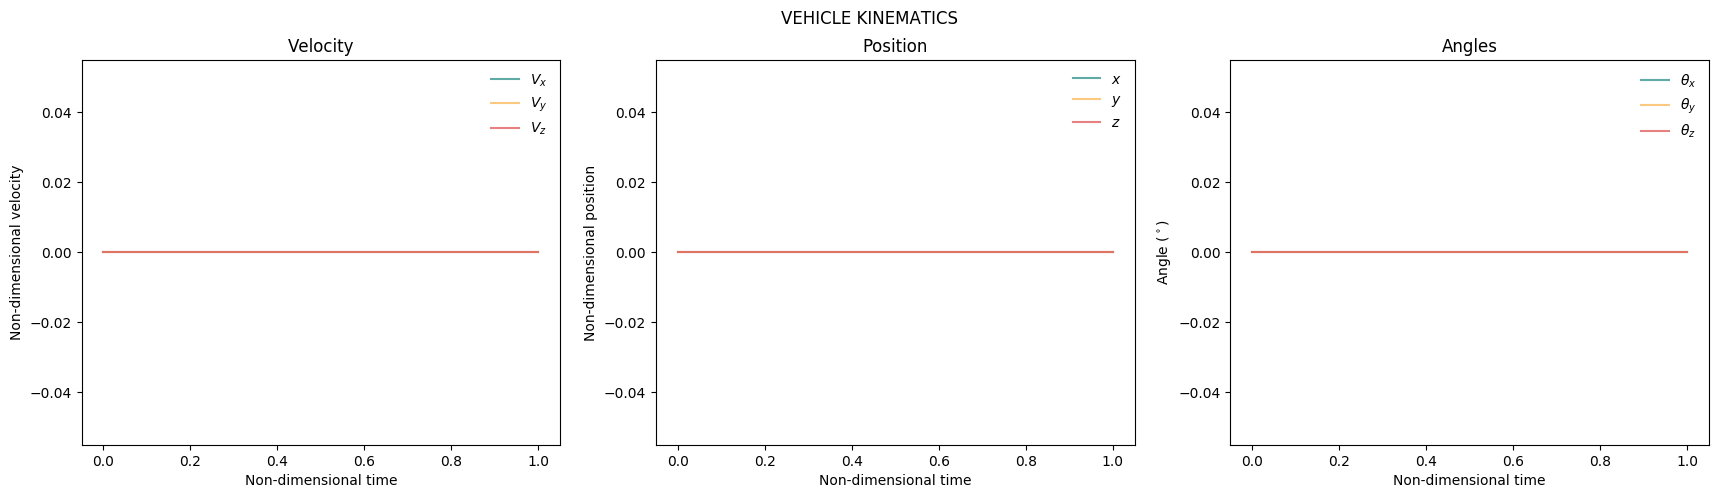

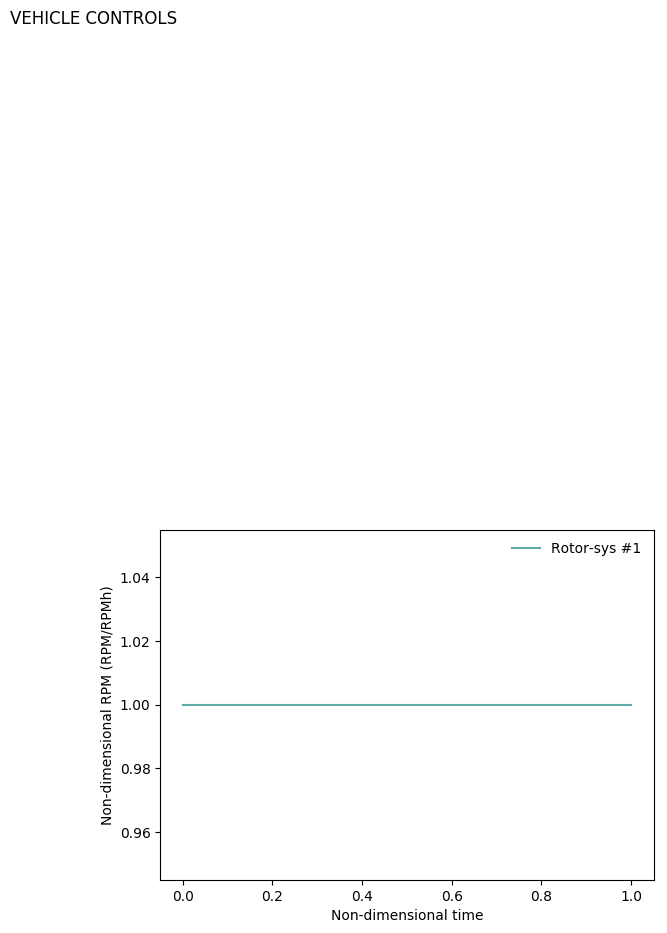

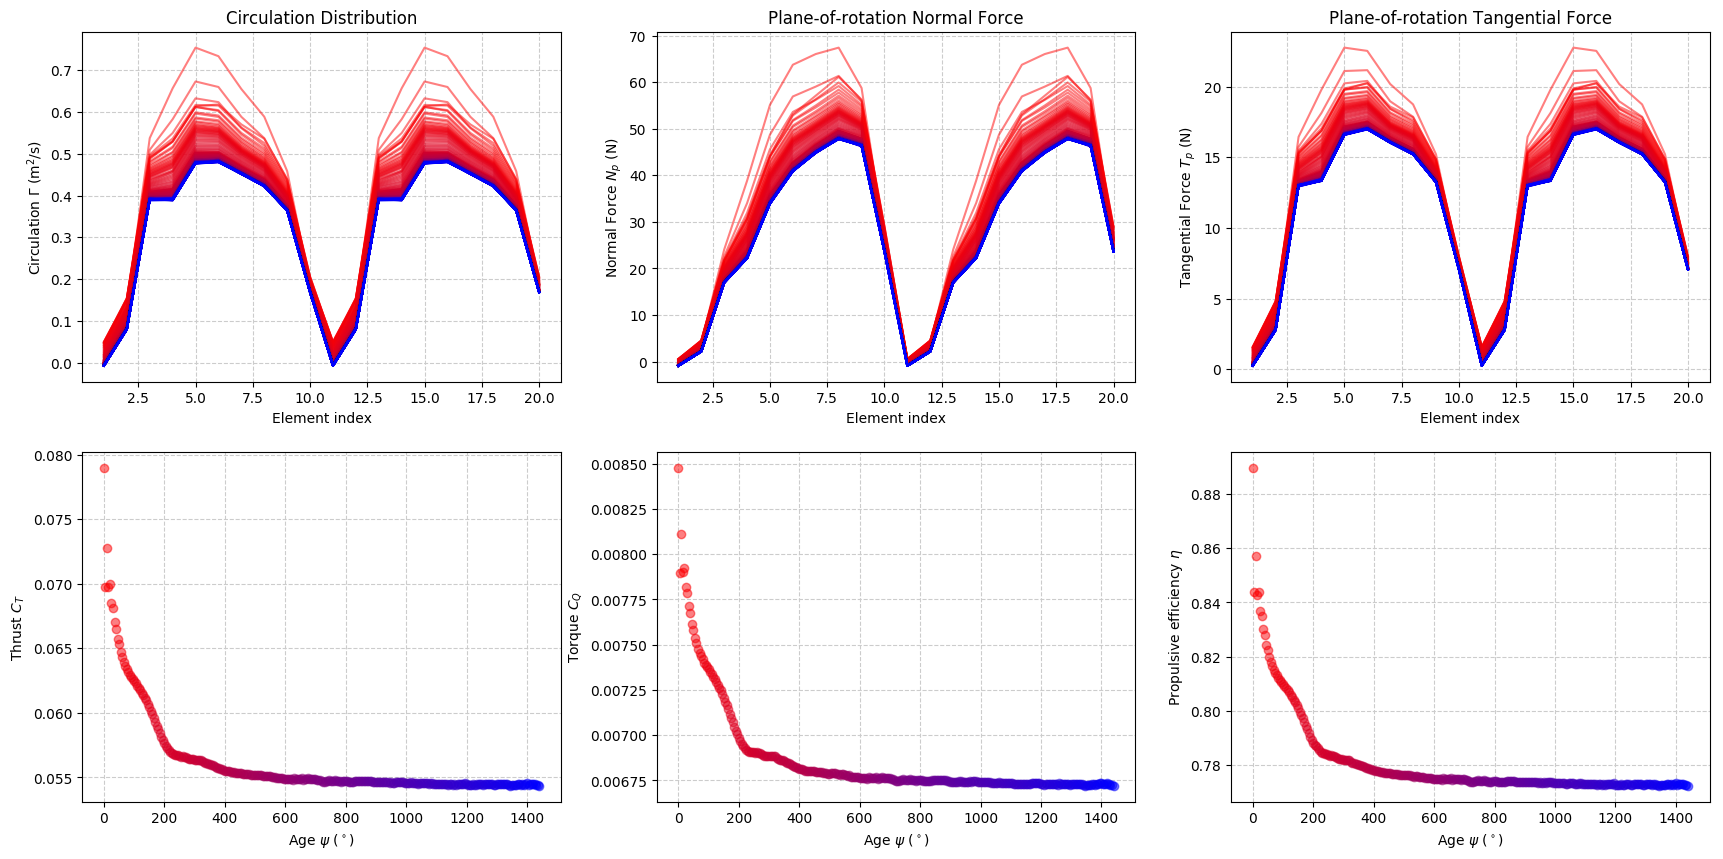

Time step 280 out of 288 	Particles: 12828
*******************************************************************
END 	2019-12-26T15:24:08.235
*******************************************************************
ELAPSED TIME: 0 hours 6 minutes 47 seconds


In [8]:
singleprop();

# Verification and Numerical Observations

## VLM Regularization

Sometime ago I improvised a regularization of the VLM that stayed implemented into the solver. This is done by multiplying the VLM singular kernel by Winckelmans' regularization function. However, the solver tends to oscillate if the regularization radius overlaps any of the control points:

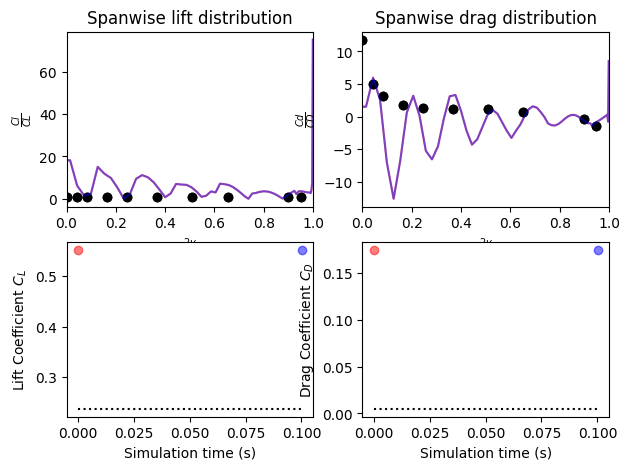

In [22]:
bertin_VLM(; wake_coupled=false, nsteps=1, vlm_fsgm=0.1,
                        verbose=false, disp_plot=true, figsize_factor=1/2);

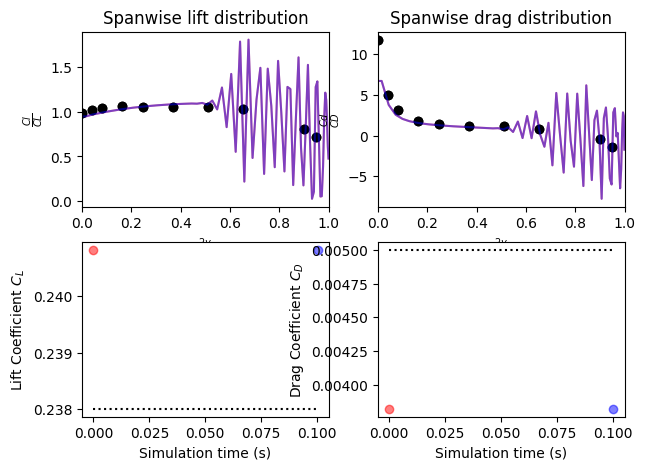

In [23]:
bertin_VLM(; wake_coupled=false, nsteps=1, vlm_fsgm=0.01,
                        verbose=false, disp_plot=true, figsize_factor=1/2);

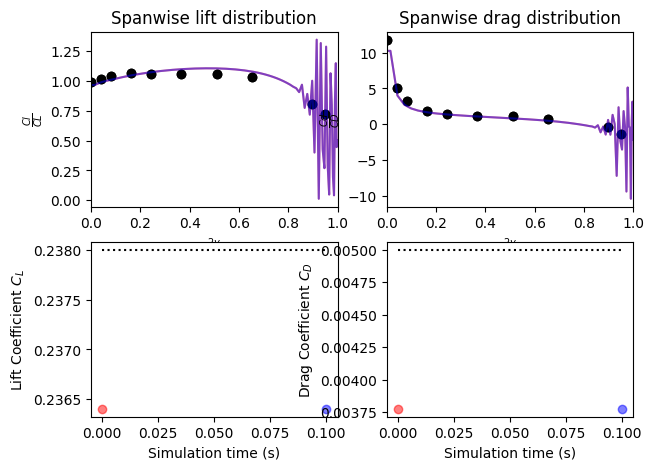

In [24]:
bertin_VLM(; wake_coupled=false, nsteps=1, vlm_fsgm=0.005,
                        verbose=false, disp_plot=true, figsize_factor=1/2);

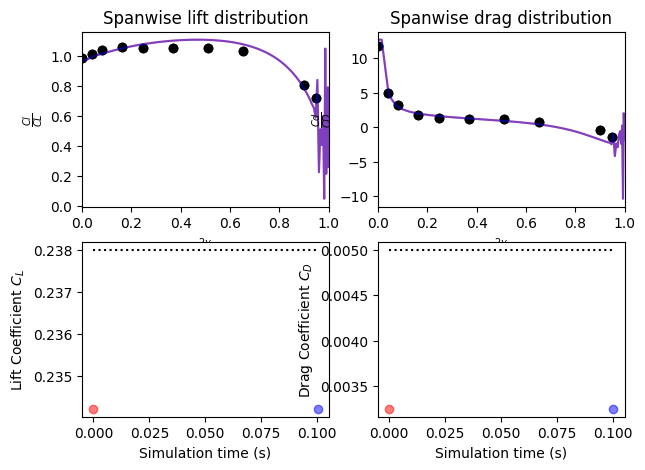

In [25]:
bertin_VLM(; wake_coupled=false, nsteps=1, vlm_fsgm=0.0025,
                        verbose=false, disp_plot=true, figsize_factor=1/2);

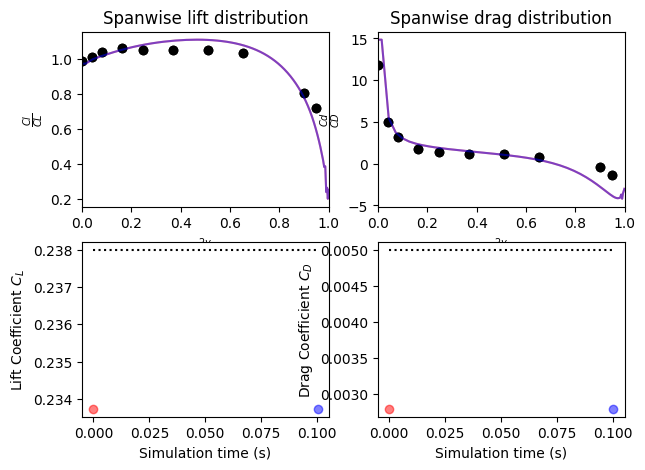

In [26]:
bertin_VLM(; wake_coupled=false, nsteps=1, vlm_fsgm=0.00125,
                        verbose=false, disp_plot=true, figsize_factor=1/2);

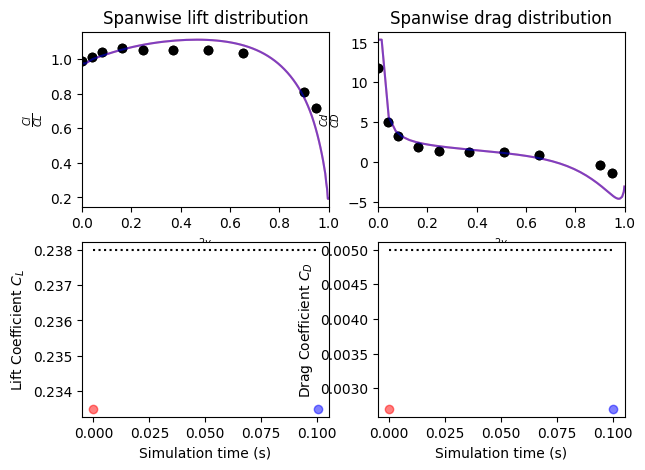

In [27]:
bertin_VLM(; wake_coupled=false, nsteps=1, vlm_fsgm=0.001,
                        verbose=false, disp_plot=true, figsize_factor=1/2);

## VLM Relaxation

Playing around with `p_per_step`, I realized that the density of particles messes up with the stability of the VLM. Here is a completly stable simulation resolving two span distances in 150 steps with core overlap 2:

<img src="https://media.githubusercontent.com/media/byuflowlab/FLOWFVS/master/docs/vid/bertinswing06_3.gif" alt="Vid here" width="700px">

Here is what happens when I double the time steps to 300:

<img src="https://media.githubusercontent.com/media/byuflowlab/FLOWFVS/master/docs/vid/bertinswing08.gif" alt="Vid here" width="700px">

Here is what happens if I deactivate the unsteady-loading wake shedding:

<img src="https://media.githubusercontent.com/media/byuflowlab/FLOWFVS/master/docs/vid/bertinswing09.gif" alt="Vid here" width="700px">

I'm pretty sure the instability would be solved if I were to move the unsteady-loading vortex further away from the control points. I think this could be why some authors include a buffer layer in the wake in between the VLM and the VPM. 

Wait, that's not true. It was still unstable with 150 time steps with `p_per_step=2`, which keeps the same distance in the unsteady shedding lines to the control points but with a smaller core size. It must be a matter of core size then (increasing the number of time steps at a constant core overlap decreases the core size).

Ok, I think I fixed it. I introduced relaxation factor that stiffens (or damps) the VLM solution in time as

```julia

    # Relaxes (vlm_rlx->1) or stiffens (vlm_rlx->0) the VLM solution
    if vlm_rlx > 0
        rlxd_Gamma = vlm_rlx*vlm_system.sol["Gamma"] + (1-vlm_rlx)*prev_vlm_system.sol["Gamma"]
        vlm._addsolution(vlm_system, "Gamma", rlxd_Gamma)
    end
```

Here is what the simulation looks like with 300 time steps, unsteady shedding, and `vlm_rlx=0.75`:

<img src="https://media.githubusercontent.com/media/byuflowlab/FLOWFVS/master/docs/vid/bertinswing10.gif" alt="Vid here" width="700px">

## `p_per_step`

I introduced a parameter to control the number of particle sheddings per time steps, called `p_per_step`. With this we can control the particle density independently of temporal resolution. For instance, here are the core sizes (scaled by x0.25) of Bertin's wing (zoomed at the root) at `p_per_step=1`

<img src="img/bertinspps1.png" alt="Pic here" width="700px">

Here is at `p_per_step=4`:

<img src="img/bertinspps4.png" alt="Pic here" width="700px">

Notice that we increase the density while mantaining the same core overlap of 2 (remember that core sizes are scaled by x0.25 in the image). Also notice that `p_per_step` controls only the trailing vortices. Unsteady-loading vortices are shed at every time step when the loading has changed.

## Rotor Relaxation

<img src="https://media.githubusercontent.com/media/byuflowlab/FLOWFVS/master/docs/vid/fvs_singlerotor00.gif" alt="Vid here" width="700px">

The same instabilities of the VLM solver is also observed in the rotor solver. In order to relax the solver I use the `surf_sigma` parameter that dictates the smoothing radius of the VPM-representation of the lifting surface for calculating the induced velocity on itself. The smaller this parameter is, the more unstable the solver will become. I have observed that a value of a tenth of the radius (`surf_sigma=R/10`) or larger leads to a completely stable rotor simulation.